In [155]:
import sympy as sp
import numpy as np
from matplotlib import pyplot

sp.init_printing()

In [156]:
x = sp.Symbol('x', real=True)
n = sp.Symbol('n', integer=True, odd=True)
k = sp.Symbol('k', integer=True)
a = sp.Symbol('a', real=True, positive=True)
p = sp.Symbol('p', real=True, positive=True)

j = sp.Symbol('j', integer=True, odd=True)

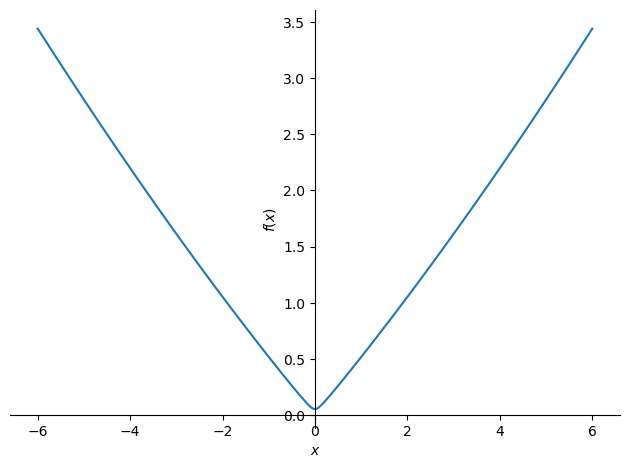

In [184]:
p_num = 4
a_num = 0.1

V = [sp.sqrt(x**2+a**2)-a, 
     1/a * sp.log((sp.exp(a*sp.sqrt(x**2+a**2))+1)/2),
     (sp.Abs(x)**p+a**p)**(1/p)-a][1]

f = [V, V.diff(x)][0]

display(f)
display(f.subs(a, a_num))
sp.plot(f.subs(a, a_num).subs(p,p_num), (x, -6, 6))

f = f.subs(p, p_num)

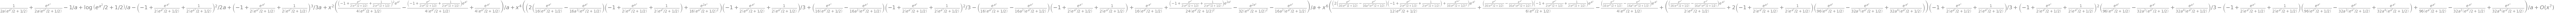

In [185]:
max_order = 7
f_series = sp.series(f, x, 0, max_order)

#f_exp = sum(f_series.args[:-1])

#display(f)
display(f_series)

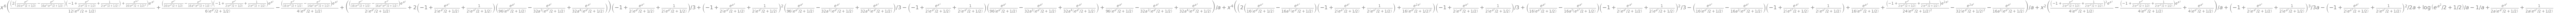

In [186]:
effy_series = sp.Integer(0)

for argui in f_series.args[:-1]:
    effy_series += argui

display(effy_series)

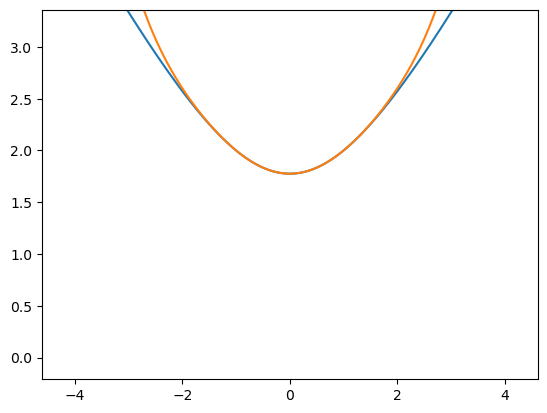

In [187]:
a_num = 2.1

effy_plot = sp.lambdify(x, effy_series.subs(a, a_num), 'numpy')
f_plot = sp.lambdify(x, f.subs(a, a_num), 'numpy')

x_ = np.linspace(-2*a_num, 2*a_num, 200)

pyplot.plot(x_, f_plot(x_))
pyplot.plot(x_, effy_plot(x_))
pyplot.ylim(-0.1*a_num,1.6*a_num)

A expansão gera os seguintes termos:

In [5]:
coeffs = [-terms[0].args[1],]
for term in terms[1:]:
    coeffs.append(term.args[0])

display(terms)
print(coeffs)

[1, -3, 45, -1575, 99225, -9823275, 1404728325]


Esses termos são descritos pelo numerador da série 

$a(n) = \dfrac{(2n+1)! C(2n, n)}{2^{2n}} \Big/ (2n+1)!$

In [21]:
def a_numerator(n_num):
    if not n_num%2: return 0

    #a(n) = (2n+1)! * C(2n, n) / 2^(2n)

    return (-1)**((n_num-1)/2)*sp.factorial(n_num) * sp.binomial(n_num-1, (n_num-1)/2) / 2**(n_num-1)

def a_denominator(n_num):
    if not n_num%2: return 1

    return sp.factorial(n_num)

def a_n(n_num):
    return sp.Rational(a_numerator(n_num), a_denominator(n_num))

for i in range(0, 7):
    a_nummy = sp.Integer(a_numerator(i))
    a_denny = sp.Integer(a_denominator(i))
    print(f"{i}  ->  {indices[i]}  ->  {a_nummy}/{a_denny} = {a_nummy/a_denny}")

0  ->  1  ->  0/1 = 0
1  ->  3  ->  1/1 = 1
2  ->  5  ->  0/1 = 0
3  ->  7  ->  -3/6 = -1/2
4  ->  9  ->  0/1 = 0
5  ->  11  ->  45/120 = 3/8
6  ->  13  ->  0/1 = 0


Portanto,

In [22]:
sp.Eq(sp.Symbol('a_k'), a_numerator(k))

Mas lembrando que os coeficientes devem corresponder a $k=\dfrac{n-1}{2}$, em que:

In [23]:
for i in range(len(indices)):
    print(f"k={i}  ->  n={indices[i]}")

k=0  ->  n=1
k=1  ->  n=3
k=2  ->  n=5
k=3  ->  n=7
k=4  ->  n=9
k=5  ->  n=11
k=6  ->  n=13


In [24]:
for i in range(0, 7):
    print(i, ' -> ', a_numerator(i))

0  ->  0
1  ->  1.00000000000000
2  ->  0
3  ->  -3.00000000000000
4  ->  0
5  ->  45.0000000000000
6  ->  0


In [25]:
def f_expansion(n_num, x=sp.Symbol('x')/sp.Symbol('a')):
    term = sp.Integer(0)

    for i in range(n_num, -1, -1):
        term += x**i * a_n(i)

    return term

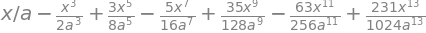

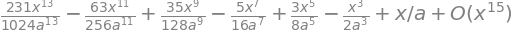

In [27]:
display(f_expansion(max_order-1))
display(f_series)

In [56]:
coeff = (-1)**((n-1)/2) * 2**(1-n)*sp.binomial(n-1, (n-1)/2)
display(coeff)

In [65]:
sp.binomial(n, (n-1)/2) * sp.binomial(n, (n+k)/2)

In [117]:
def C(n_,k_):
    return sp.Rational(sp.factorial(n_), sp.factorial(k_) * sp.factorial(n_-k_))

In [119]:
def CC(n_, k_):
    return C(n_-1,(n_-1)/2) * C(n_,(n_+k_)/2)

In [128]:
def C_k(k_, n_trunc, Aa_coeff=1):
    if not (k_%2==1): raise Exception(f"bad k: k_={k_}")

    summy = sp.Integer(0)

    for n_ in range(k_, n_trunc, 2):
        sissy = CC(n_, k_)
        summy += (-1)**((n_-1)/2) * (Aa_coeff)**n_ *sissy

    return summy

In [168]:
for i in range(1, 31, 2):
    print(C_k(1, i, 0.2))

0
0
0
0
-0.000256000000000000
6.65600000000001e-5
-0.000217292800000000
-8.07731199999983e-7
-0.000154315325440000
-4.99301613568000e-5
-0.000119092023918592
-7.40380105926247e-5
-0.000103052795174548
-8.45155716916524e-5
-9.62921607278447e-5


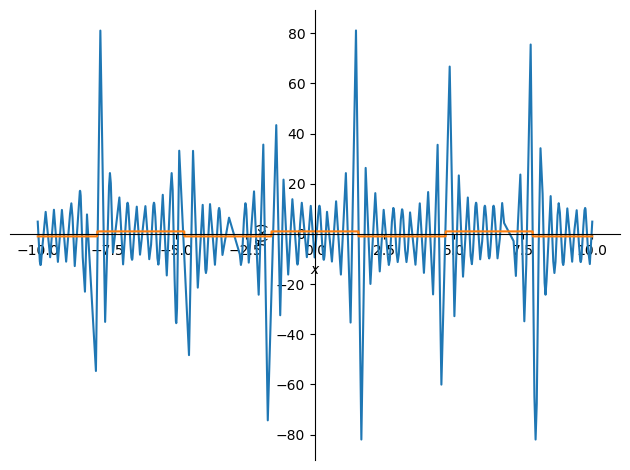

In [213]:
funky = sp.Integer(0)


for k in range(1, 21, 2):
    funky += C_k(k, k+6, 0.5) * sp.cos(k*x)

display(funky)
sp.plot(funky, sp.sign(sp.cos(x)))

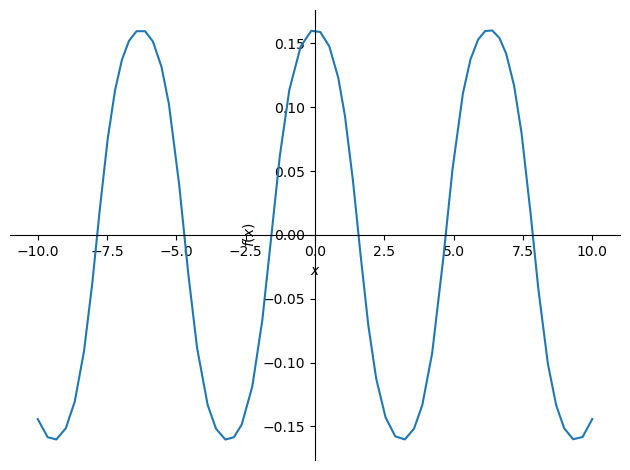

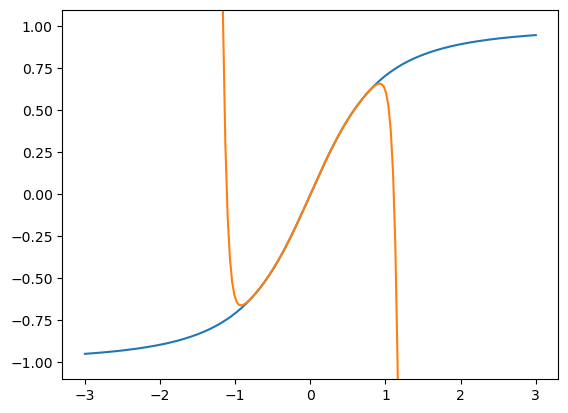

In [116]:
a_num = 1

f_num = sp.lambdify(x, f.subs(a, a_num), 'numpy')
f_exp_num = sp.lambdify(x, f_exp.subs(a, a_num), 'numpy')

x_num = np.linspace(-3*a_num,3*a_num,200)
ax = pyplot.plot(x_num, f_num(x_num))
ax.extend(pyplot.plot(x_num, f_exp_num(x_num)))

pyplot.ylim(-1.1, 1.1)
